In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from ext.utils import is_non_dominated
from ext.plot_figs import get_default_fig
from ext.lbd import cpt_lbd_correl, cpt_lb_ind

In [2]:
K, d = 5, 2
𝝻  = arms_means = np.array([[ 0.72875559,  1.20119222],
                            [0.45524805, -0.63317069],
                            [0.62826926,  1.27683777],
                            [0.94570734,  2.31592981],
                            [ 2.08131887,  1.4809387 ]])
ps_mask = is_non_dominated(arms_means)
arms = np.arange(K)
ps = arms[ps_mask]
non_ps = arms[~ps_mask]

##### Compute the characteristic time $T^*[\theta, \rho]$

In [3]:
nval = 10
rho = np.linspace(-3+1e-4, 1-1e-5, nval)
niter = 500
def wrp_rho(k, niter):
    Z = np.ones((d, d)) *(1+rho[k])/2
    np.fill_diagonal(Z, np.ones(d))
    return (cpt_lbd_correl(𝝻, Z, niter=niter)[1], k)
res_rho = Parallel(n_jobs=-1, verbose=1)(delayed(wrp_rho)(k, niter) for k in range(nval))
res_rho = np.array(sorted(res_rho, key=lambda x: x[-1]))
T_ref  = cpt_lbd_correl(𝝻, np.diag(np.ones(d)), niter=niter)[1]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   10.6s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.0s finished


<Figure size 640x480 with 0 Axes>

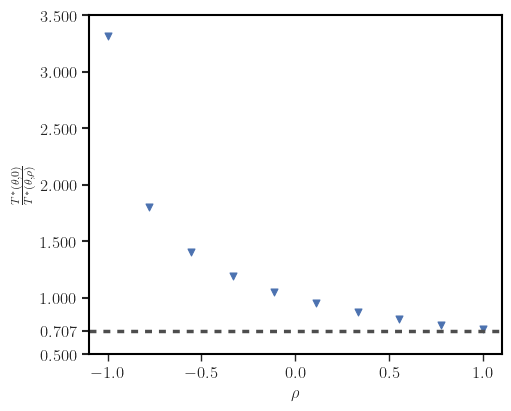

In [5]:
fig = get_default_fig()
plt.scatter((1+rho)/2, T_ref/res_rho[:,0], marker="v")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\frac{T^*(\theta, 0)}{T^*(\theta, \rho)}$"); 
eps = -0.02
plt.axhline(min(T_ref/res_rho[:,0])+eps, color=".3", dashes=(2, 2))
plt.yticks(list(plt.yticks()[0]) + [eps + min(T_ref/res_rho[:,0])])
fig.savefig("T_rho.pdf", transparent=True, dpi=2000,
                edgecolor='black', backend="pgf", format="pdf")

In [7]:
list(zip((1+rho)/2, T_ref/res_rho[:,0]))

[(-0.9999499999999999, 3.314775113075577),
 (-0.7777338888888887, 1.8020494390446489),
 (-0.5555177777777778, 1.404063186148586),
 (-0.3333016666666666, 1.1925866998938768),
 (-0.11108555555555555, 1.0524637967339772),
 (0.11113055555555551, 0.9559611111814786),
 (0.3333466666666667, 0.8766094609001821),
 (0.5555627777777776, 0.8148180276191305),
 (0.7777788888888888, 0.7642684703932492),
 (0.999995, 0.7265963338604462)]